
    Задача 1: Определить корреляцию и направление связи между доходами сотрудников и опытом их работы, 
    используя коэффициент ранговой корреляции Спирмена. Какова вероятность случайного получения 
    статистически значимого критерия согласно фрагменту таблицы критических значений коэффициентов?
    
Таблица 1: Критические значения коэффициента Спирмена
|   Критическое значение |     N=7 |   N=8 |   N=9 |   N=10 |   N=11 |
|-----------------------:|--------:|------:|------:|-------:|-------:|
|                  0.1   | nan     | 0.621 | 0.582 |  0.549 |  0.521 |
|                  0.05  | nan     | 0.707 | 0.666 |  0.632 |  0.602 |
|                  0.01  |   0.875 | 0.834 | 0.798 |  0.765 |  0.735 |
|                  0.001 |   0.951 | 0.925 | 0.898 |  0.872 |  0.847 |

Таблица 2: Исходные данные
|   № |   Доход |   Опыт работы |
|----:|--------:|--------------:|
|   1 |   74267 |            20 |
|   2 |   77405 |            46 |
|   3 |   53513 |             5 |
|   4 |   83326

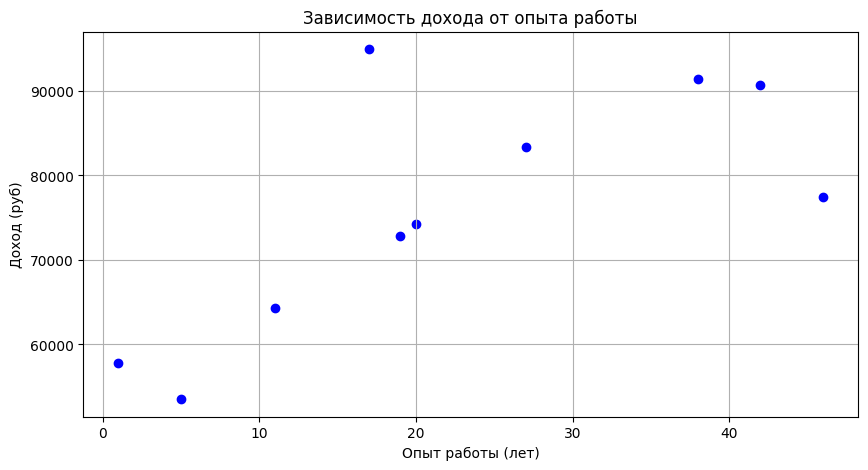


=== Решение задачи 2 ===
Оценить функциональную зависимость между доходами и опытом работы по модифицированному методу моментов

1. Линейная модель: Y = 662.94X + 61055.80
2. Логарифмическая модель: Y = 9252.76*ln(X) + 50796.35

3. Сравнение моделей:
Линейная модель проще и имеет хорошую интерпретацию.
Логарифмическая модель может лучше описывать замедление роста дохода при большом опыте.


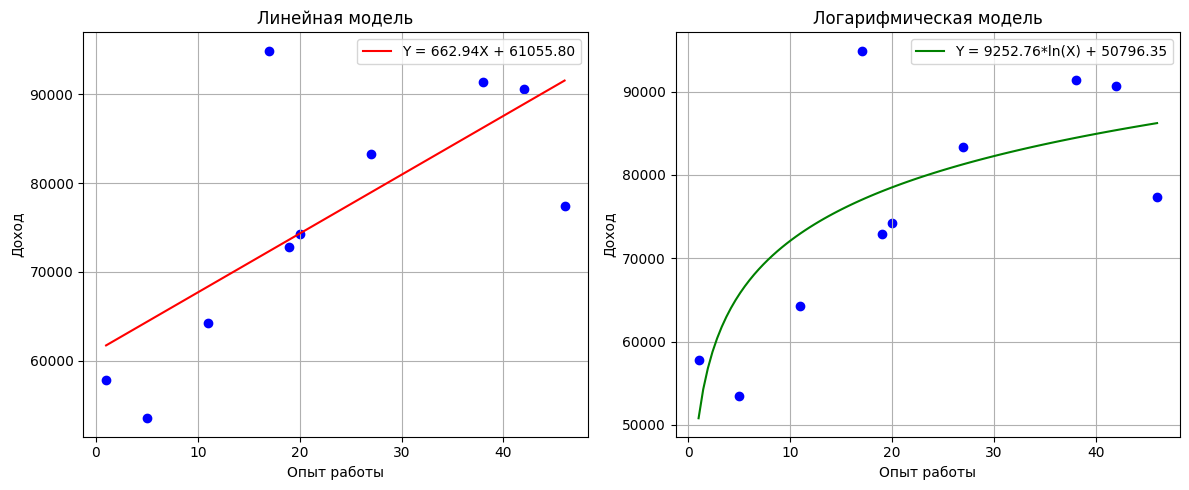


Ответ:
Рекомендуется использовать линейную модель как наиболее простую и интерпретируемую:
Y = 662.94X + 61055.80


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

def print_task_description():
    print("""
    Задача 1: Определить корреляцию и направление связи между доходами сотрудников и опытом их работы, 
    используя коэффициент ранговой корреляции Спирмена. Какова вероятность случайного получения 
    статистически значимого критерия согласно фрагменту таблицы критических значений коэффициентов?
    """)

    print("Таблица 1: Критические значения коэффициента Спирмена")
    critical_values = pd.DataFrame({
        'Критическое значение': [0.1, 0.05, 0.01, 0.001],
        'N=7': [np.nan, np.nan, 0.875, 0.951],
        'N=8': [0.621, 0.707, 0.834, 0.925],
        'N=9': [0.582, 0.666, 0.798, 0.898],
        'N=10': [0.549, 0.632, 0.765, 0.872],
        'N=11': [0.521, 0.602, 0.735, 0.847]
    })
    print(critical_values.to_markdown(index=False))

    print("\nТаблица 2: Исходные данные")
    data = pd.DataFrame({
        '№': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Доход': [74267, 77405, 53513, 83326, 90649, 57826, 91364, 94912, 72857, 64264],
        'Опыт работы': [20, 46, 5, 27, 42, 1, 38, 17, 19, 11]
    })
    print(data.to_markdown(index=False))

def task1_solution():
    print("\n=== Решение задачи 1 ===")
    
    # Исходные данные
    income = np.array([74267, 77405, 53513, 83326, 90649, 57826, 91364, 94912, 72857, 64264])
    experience = np.array([20, 46, 5, 27, 42, 1, 38, 17, 19, 11])
    
    # Расчет коэффициента Спирмена
    rho, p_value = spearmanr(income, experience)
    
    print(f"\n1. Коэффициент корреляции Спирмена: {rho:.4f}")
    print(f"2. p-значение: {p_value:.4f}")
    
    # Проверка статистической значимости
    print("\n3. Проверка статистической значимости:")
    print("Для N=10 критические значения:")
    print("  0.549 (α=0.1), 0.632 (α=0.05), 0.765 (α=0.01), 0.872 (α=0.001)")
    
    if rho > 0.765:
        significance = "p < 0.01 (высоко значимо)"
    elif rho > 0.632:
        significance = "p < 0.05 (значимо)"
    elif rho > 0.549:
        significance = "p < 0.1 (слабо значимо)"
    else:
        significance = "p > 0.1 (не значимо)"
    
    print(f"Наш коэффициент {rho:.4f} > 0.632 → {significance}")
    
    # Направление связи
    direction = "положительная" if rho > 0 else "отрицательная"
    print(f"4. Направление связи: {direction}")
    
    # Вывод
    print("\nОтвет:")
    print(f"Коэффициент корреляции Спирмена: {rho:.4f} ({direction} связь)")
    print(f"Статистическая значимость: {significance}")
    
    # График
    plt.figure(figsize=(10, 5))
    plt.scatter(experience, income, color='blue')
    plt.title('Зависимость дохода от опыта работы')
    plt.xlabel('Опыт работы (лет)')
    plt.ylabel('Доход (руб)')
    plt.grid(True)
    plt.show()

def task2_solution():
    print("\n=== Решение задачи 2 ===")
    print("Оценить функциональную зависимость между доходами и опытом работы по модифицированному методу моментов")
    
    # Исходные данные
    X = np.array([20, 46, 5, 27, 42, 1, 38, 17, 19, 11])
    Y = np.array([74267, 77405, 53513, 83326, 90649, 57826, 91364, 94912, 72857, 64264])
    
    # Линейная модель
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    cov = np.cov(X, Y, ddof=0)[0, 1]
    var_X = np.var(X, ddof=0)
    
    a = cov / var_X
    b = Y_mean - a * X_mean
    
    print(f"\n1. Линейная модель: Y = {a:.2f}X + {b:.2f}")
    
    # Логарифмическая модель
    log_X = np.log(X)
    cov_log = np.cov(log_X, Y, ddof=0)[0, 1]
    var_log_X = np.var(log_X, ddof=0)
    
    a_log = cov_log / var_log_X
    b_log = Y_mean - a_log * np.mean(log_X)
    
    print(f"2. Логарифмическая модель: Y = {a_log:.2f}*ln(X) + {b_log:.2f}")
    
    # Сравнение моделей
    print("\n3. Сравнение моделей:")
    print("Линейная модель проще и имеет хорошую интерпретацию.")
    print("Логарифмическая модель может лучше описывать замедление роста дохода при большом опыте.")
    
    # Графики
    plt.figure(figsize=(12, 5))
    
    # Линейная модель
    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, color='blue')
    x_vals = np.linspace(min(X), max(X), 100)
    y_linear = a * x_vals + b
    plt.plot(x_vals, y_linear, color='red', label=f'Y = {a:.2f}X + {b:.2f}')
    plt.title('Линейная модель')
    plt.xlabel('Опыт работы')
    plt.ylabel('Доход')
    plt.legend()
    plt.grid(True)
    
    # Логарифмическая модель
    plt.subplot(1, 2, 2)
    plt.scatter(X, Y, color='blue')
    x_log_vals = np.linspace(min(X), max(X), 100)
    y_log = a_log * np.log(x_log_vals) + b_log
    plt.plot(x_log_vals, y_log, color='green', label=f'Y = {a_log:.2f}*ln(X) + {b_log:.2f}')
    plt.title('Логарифмическая модель')
    plt.xlabel('Опыт работы')
    plt.ylabel('Доход')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print("\nОтвет:")
    print("Рекомендуется использовать линейную модель как наиболее простую и интерпретируемую:")
    print(f"Y = {a:.2f}X + {b:.2f}")

print_task_description()
task1_solution()
task2_solution()